<a href="https://colab.research.google.com/github/Swehtam/Arquitetura2_Imagens/blob/master/Trabalho_1_Arquitetura_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy
import time
from skimage import io, viewer, color
from skimage.transform import resize
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False

In [196]:
!git init
!git remote add origin https://github.com/Swehtam/Arquitetura2_Imagens.git
!git pull origin master

Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/Swehtam/Arquitetura2_Imagens
 * branch            master     -> FETCH_HEAD
Already up to date.


In [0]:
# Metodo para processar a imagem que necessite de Permutação e Fusão de loop
def BWPermutaSlow(image):
    aux = np.zeros_like(image, dtype=np.uint8)
    Y = np.zeros_like(image[:,:,0], dtype=np.uint8)
        
    start = time.time()
    
    # Permutação de loops,
    # o lado que tiver maior tamanho está no segundo for
    # fazendo com que ele percorra distâncias maiores
    if(image.shape[0] > image.shape[1]):
        for y in range(image.shape[1]):
            for x in range(image.shape[0]):
                Y[x,y] = (image[x,y,0] * 0.2126 + image[x,y,1] * 0.7152 + 
                     image[x,y,2] * 0.0722).astype(np.uint8)
                     
        # Fusão de Loops
        for y in range(image.shape[1]):
            for x in range(image.shape[0]):
                aux[x,y,0] = Y[x,y]
                aux[x,y,1] = Y[x,y]
                aux[x,y,2] = Y[x,y]
                
    else:
        for x in range(image.shape[0]):
            for y in range(image.shape[1]):
                Y[x,y] = (image[x,y,0] * 0.2126 + image[x,y,1] * 0.7152 + 
                         image[x,y,2] * 0.0722).astype(np.uint8)

        for x in range(image.shape[0]):
            for y in range(image.shape[1]):
                aux[x,y,0] = Y[x,y]
                aux[x,y,1] = Y[x,y]
                aux[x,y,2] = Y[x,y]

    end = time.time()
    total = end - start
    return aux, total

def BWPermutaFast(image):
    aux = np.zeros_like(image, dtype=np.uint8)
    
    start = time.time()
    
    if(image.shape[0] > image.shape[1]):
        for x in range(image.shape[0]):
            for y in range(image.shape[1]):
                Y = (image[x,y,0] * 0.2126 + image[x,y,1] * 0.7152 + 
                         image[x,y,2] * 0.0722).astype(np.uint8)

                aux[x,y,0] = Y
                aux[x,y,1] = Y
                aux[x,y,2] = Y
                
    else:
        for y in range(image.shape[1]):
            for x in range(image.shape[0]):
                Y = (image[x,y,0] * 0.2126 + image[x,y,1] * 0.7152 + 
                         image[x,y,2] * 0.0722).astype(np.uint8)

                aux[x,y,0] = Y
                aux[x,y,1] = Y
                aux[x,y,2] = Y
    
    end = time.time()
    total = end - start            
    return aux, total

# Metodo para processar a imagem que necessite de Blocagem e Fusão de loop
def BWBlocagemSlow(image):
    aux = np.zeros_like(image, dtype=np.uint8)
    Y = np.zeros_like(image[:,:,0], dtype=np.uint8)
    z = np.random.uniform(0, 1, (image[:,:,0]).shape)
    safe = np.zeros_like(img[:,:,0], dtype=np.float64)
    
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            Y[x,y] = (image[x,y,0] * 0.2126 + image[x,y,1] * 0.7152 + 
                     image[x,y,2] * 0.0722).astype(np.uint8)
                
    
    # O tempo só começa aqui por que não só estamos calculando a demora da
    # blocagem e da fusão de loop
    start = time.time()
    
    #Blocagem
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            
            r = 0
            
            for k in range(image.shape[0]):
                r = r + Y[x,k] * z[k, y]
                    
            # Fora do for do 'k'                    
            safe[x,y] = safe[x,y] + r

            
    end = time.time()
    total = end - start

    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            a = (safe[x,y] % 256).astype(np.uint8)
            aux[x,y,0] = a
            aux[x,y,1] = a
            aux[x,y,2] = a
            
    return aux, total, Y, z

def BWBlocagemFast(image, B, YEntrada, zEntrada):
    aux = np.zeros_like(image, dtype=np.uint8)
    safe = np.zeros_like(img[:,:,0], dtype=np.float64)

    start = time.time()
    
    #Blocagem
    
    yy = 0
    while yy < image.shape[1]:
        
        kk = 0
        while kk < image.shape[1]:
            for x in range(image.shape[0]):
                for y in range(yy, min(yy + B, image.shape[1])):

                    r = 0

                    for k in range(kk, min(kk + B, image.shape[0])):
                        r = r + YEntrada[x,k] * zEntrada[k, y]

                    # Fora do for do 'k'                    
                    safe[x,y] = safe[x,y] + r
                    
            # Acabou o while do kk            
            kk = kk + B

        # Acabou o while do yy
        yy = yy + B
                
    end = time.time()
    total = end - start
    
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            a = (safe[x,y] % 256).astype(np.uint8)
            aux[x,y,0] = a
            aux[x,y,1] = a
            aux[x,y,2] = a
    
    return aux, total

In [205]:
imagens = ['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png',
           '8.png', '9.png', '10.png']

slowPermutaArray = []
fastPermutaArray = []

slowBlocagemArray = []
fastBlocagemArray = []

for path in imagens:
    img = io.imread('/content/' + path)
    
    SP, PermutaSlowtime = BWPermutaSlow(img)
    slowPermutaArray.append(PermutaSlowtime)
    
    FP, PermutaFasttime = BWPermutaFast(img)
    fastPermutaArray.append(PermutaFasttime)
    
    img = ((resize(img, (384, 384, 3), mode='constant')) * 255).astype(np.uint8)
    B = 64
    
    SB, BlocagemSlowtime, YBlocagem, zBlocagem = BWBlocagemSlow(img)
    slowBlocagemArray.append(BlocagemSlowtime)
    
    FB, BlocagemFasttime = BWBlocagemFast(img, B, YBlocagem, zBlocagem)
    fastBlocagemArray.append(BlocagemFasttime)
    
    print("terminou um")

terminou um
terminou um
terminou um
terminou um
terminou um
terminou um
terminou um
terminou um
terminou um
terminou um


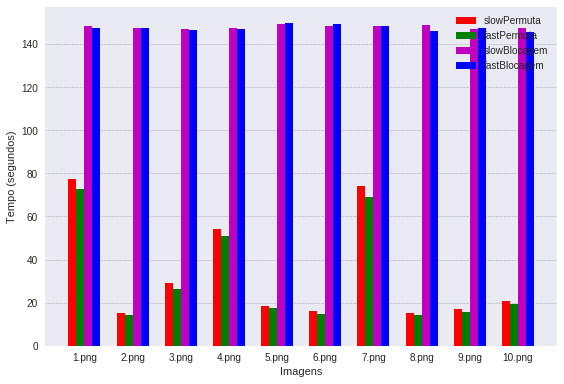

In [206]:
index = np.arange(0, len(slowPermutaArray)*4, 4)
w = 1/1.5

fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(index, slowPermutaArray, w, label='slowPermuta', color='r')
ax.bar(index + w, fastPermutaArray, w, label='fastPermuta', color='g')
ax.bar(index + (w * 2), slowBlocagemArray, w, label='slowBlocagem', color='m')
ax.bar(index + (w * 3), fastBlocagemArray, w, label='fastBlocagem', color='b')

ax.set_xlabel("Imagens")
ax.set_ylabel("Tempo (segundos)")
ax.set_xticks(index + w + w/2)
ax.set_xticklabels(imagens)
ax.legend()

plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
fig.tight_layout()

plt.show()